# JSON Dataset Visualization

In [1]:
import matplotlib.pyplot as plt
import json
import os
from src.dataset.annotations import COCOAnnotations
from src.dataset.dataset import CocoDataset
import cv2
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

Load images and annotation file

In [2]:
dataset_root = "/home/joaoherrera/server/datasets/mangoes"
dataset_images_folder = os.path.join(dataset_root, "images")
dataset_annotations_folder = os.path.join(dataset_root, "annotations")
images_path = os.listdir(dataset_images_folder)
annotations_path = os.path.join(dataset_annotations_folder, "annotations.json")

with open(annotations_path) as annotation_file:
    annotations = json.load(annotation_file)

FileNotFoundError: [Errno 2] No such file or directory: '/home/joaoherrera/server/datasets/mangoes/annotations/annotations.json'

Use CocoDataset class to split the entire dataset into two subsets.

In [ ]:
print("Complete Dataset Information")

seed = 2023
dataset = CocoDataset(dataset_images_folder, annotations_path, seed=seed)
train_subset, test_subset = dataset.split(0.8, 0.2, random=True)

print("Training Set Information")
train_subset.preview_dataset()

print("Test Set Information")
test_subset.preview_dataset()

Complete Dataset Information
Dataset categories: ['1: screw', '2: anomalous_screw']
Number of images: 1528
Number of Annotations: 1528
Per-category info:
Category Label: screw 	 Category ID: 1
Instances: 625
Category Label: anomalous_screw 	 Category ID: 2
Instances: 903
Training Set Information
Dataset categories: ['1: screw', '2: anomalous_screw']
Number of images: 1222
Number of Annotations: 1222
Per-category info:
Category Label: screw 	 Category ID: 1
Instances: 504
Category Label: anomalous_screw 	 Category ID: 2
Instances: 718
Test Set Information
Dataset categories: ['1: screw', '2: anomalous_screw']
Number of images: 305
Number of Annotations: 305
Per-category info:
Category Label: screw 	 Category ID: 1
Instances: 120
Category Label: anomalous_screw 	 Category ID: 2
Instances: 185


Show images from Training Set

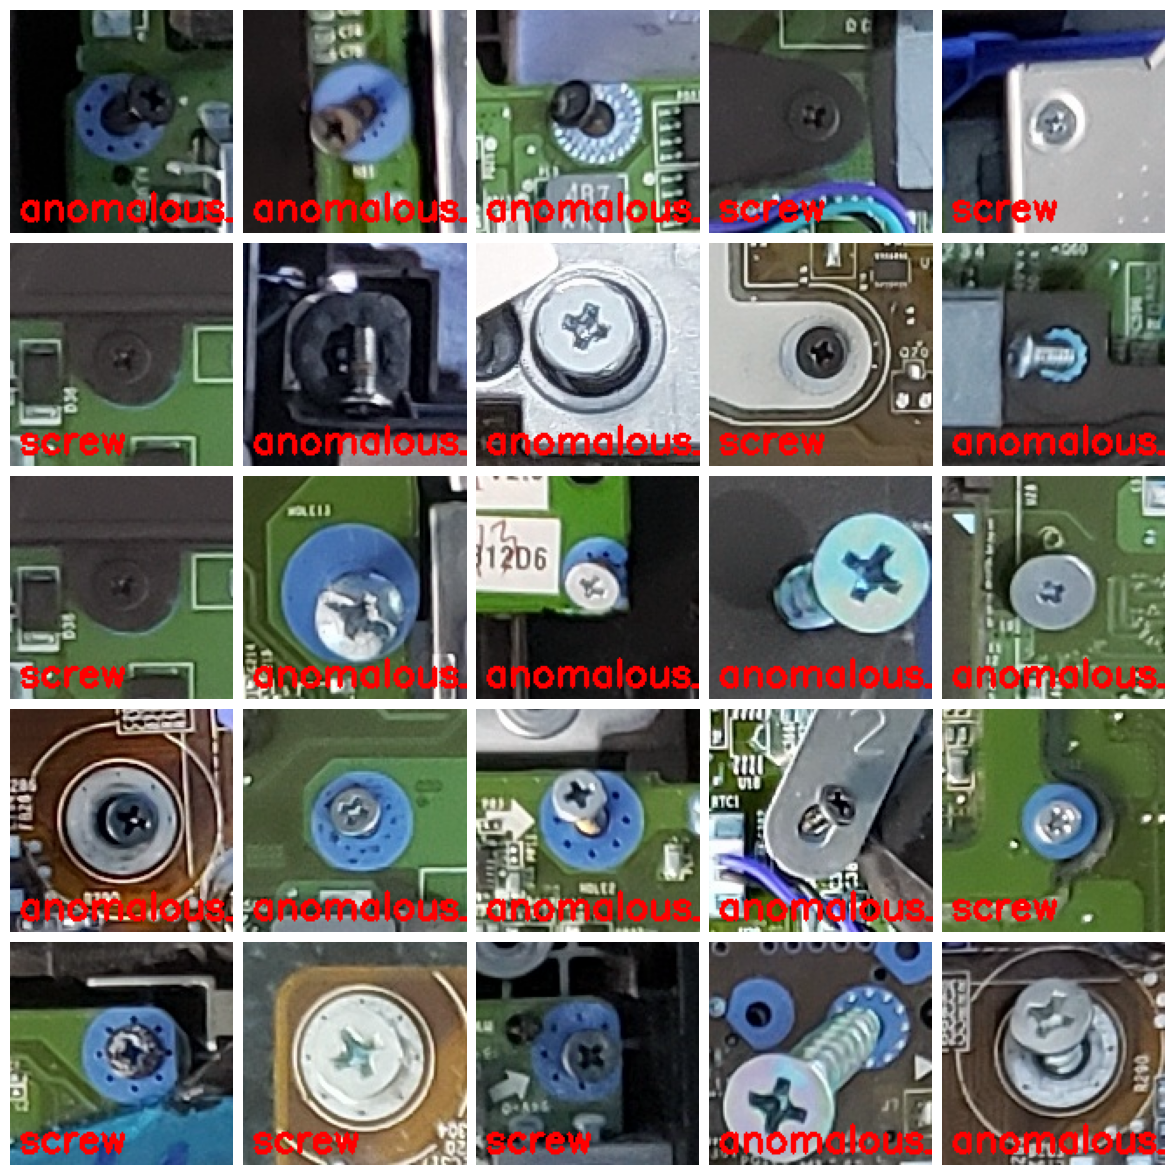

In [ ]:
grid_size = (5, 5)
np.random.shuffle(train_subset.tree.data["images"])
annotations_by_id = COCOAnnotations.to_dict(train_subset.tree.data["annotations"], "id")
categories_by_id = COCOAnnotations.to_dict(train_subset.tree.data["categories"], "id")


fig = plt.figure(figsize=(15., 15.))
grid = ImageGrid(fig, 111,  nrows_ncols=(grid_size[0], grid_size[1]),  axes_pad=0.1)

for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        ax = grid[i * grid_size[1] + j]
        image_data = train_subset.tree.data["images"][i * grid_size[1] + j]
        image_name = image_data["file_name"]
        image_id = image_data["id"]
        
        anns = annotations_by_id[image_id]
        cat = categories_by_id[anns[0]["category_id"]][0]
    
        image = cv2.imread(os.path.join(dataset_images_folder, image_name))
        cv2.putText(image, cat["name"], (5, 120), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
        
        ax.imshow(image)
        ax.axis("off")

plt.show()

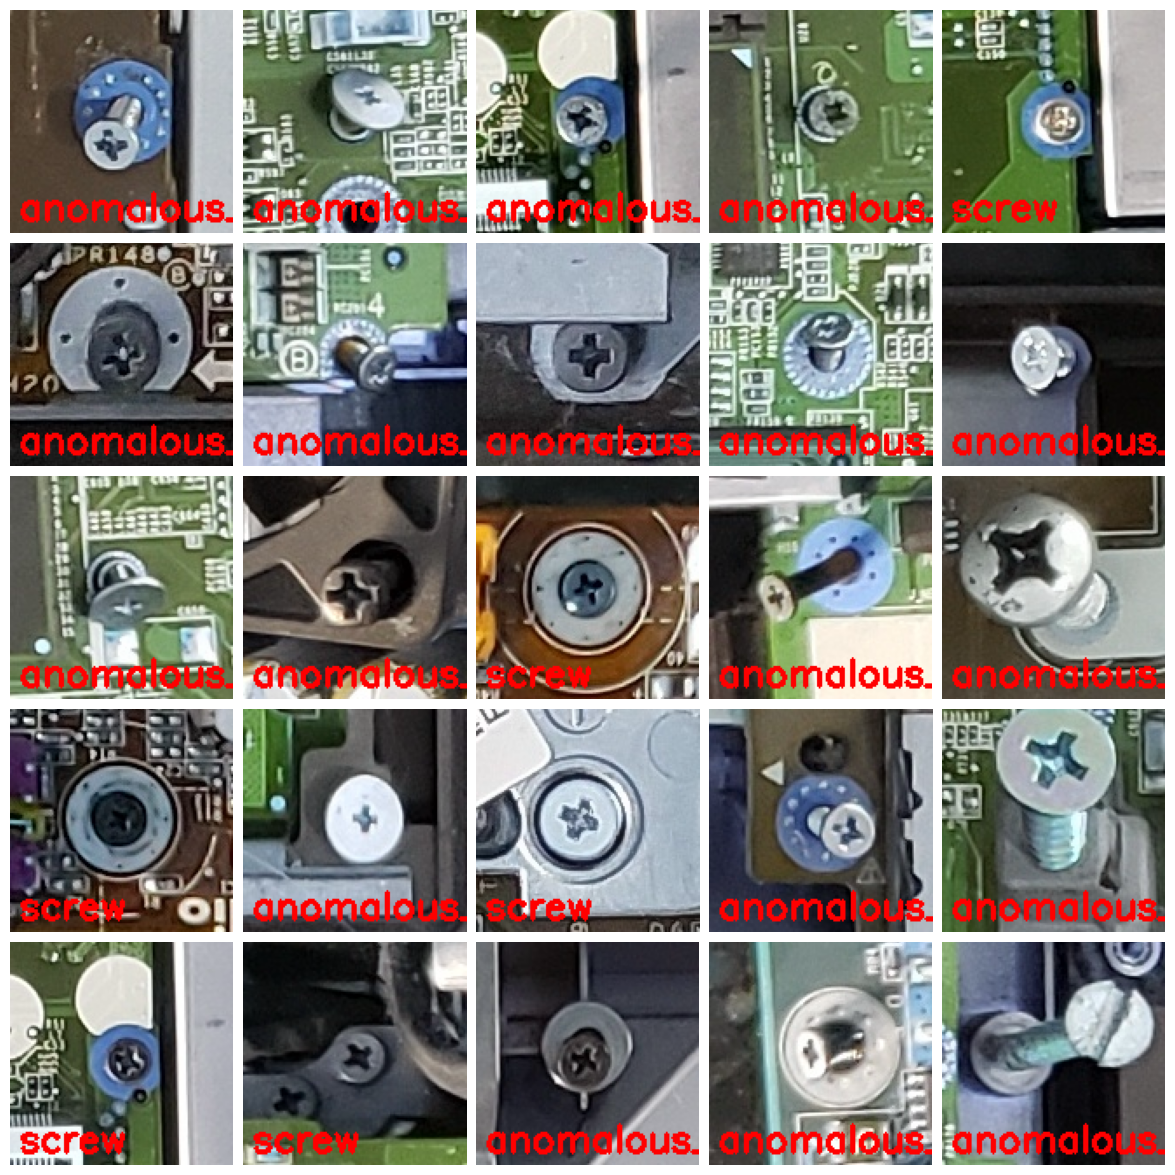

In [ ]:
grid_size = (5, 5)
np.random.shuffle(test_subset.tree.data["images"])
annotations_by_id = COCOAnnotations.to_dict(test_subset.tree.data["annotations"], "id")
categories_by_id = COCOAnnotations.to_dict(test_subset.tree.data["categories"], "id")


fig = plt.figure(figsize=(15., 15.))
grid = ImageGrid(fig, 111,  nrows_ncols=(grid_size[0], grid_size[1]),  axes_pad=0.1)

for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        ax = grid[i * grid_size[1] + j]
        image_data = test_subset.tree.data["images"][i * grid_size[1] + j]
        image_name = image_data["file_name"]
        image_id = image_data["id"]
        
        anns = annotations_by_id[image_id]
        cat = categories_by_id[anns[0]["category_id"]][0]
    
        image = cv2.imread(os.path.join(dataset_images_folder, image_name))
        cv2.putText(image, cat["name"], (5, 120), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
        
        ax.imshow(image)
        ax.axis("off")

plt.show()